In [6]:
import torch
import pickle
import matplotlib.pyplot as plt

In [2]:
import torchvision

In [7]:
from torchvision import datasets, transforms, utils
from torch.utils import data
import matplotlib.pyplot as plt
import numpy as np

In [8]:
transform=transforms.Compose([transforms.ToTensor()])

In [9]:
trainset=datasets.FashionMNIST(
            root = './.data/',
            train=True,
            download=True,
            transform=transform
)

testset=datasets.FashionMNIST(
            root='./.data/',
            train=False,
            download=True,
            transform=transform
)

Extracting ./.data/FashionMNIST\raw\train-images-idx3-ubyte.gz to ./.data/FashionMNIST\raw


Extracting ./.data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./.data/FashionMNIST\raw


Extracting ./.data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./.data/FashionMNIST\raw


Extracting ./.data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./.data/FashionMNIST\raw
Processing...


C:\Users\user\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [10]:
batch_size=16

# 학습용
train_loader=data.DataLoader(
    dataset=trainset,
    batch_size=batch_size
)

# 검증용
test_loader=data.DataLoader(
    dataset=testset,
    batch_size=batch_size
)

In [11]:
dataiter=iter(train_loader)
images, labels=next(dataiter)   # 16개 이미지 (배치크기) + 레이블 16개 => 하나의 batch

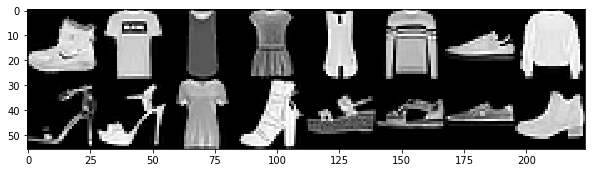

In [13]:
img=utils.make_grid(images,padding=0)   # 여러이미지를 모아 하나로
npimg=img.numpy()                       # matplotlib호환되려면 numpy() 행렬로 바꿔야됌
plt.figure(figsize=(10,7))
plt.imshow(np.transpose(npimg, (1,2,0)))
plt.show()


In [14]:
print(labels)

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9])


In [17]:
CLASSES = {0: 'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}

for label in labels:
    index=label.item()
    print(CLASSES[index])

Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top
Pullover
Sneaker
Pullover
Sandal
Sandal
T-shirt/top
Ankle boot
Sandal
Sandal
Sneaker
Ankle boot


torch.Size([1, 28, 28])
(28, 28)


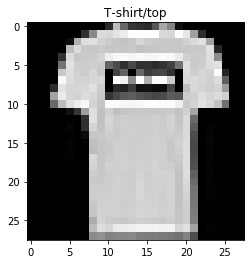

In [20]:


idx=1

item_img=images[idx] # tensor (3차원)
print(item_img.shape)
item_npimg=item_img.squeeze().numpy()     

plt.title(CLASSES[labels[idx].item()])    
print(item_npimg.shape)
plt.imshow(item_npimg, cmap='gray')
plt.show()